Attempt at creating a strategy for relatively non volatile stocks  (maybe applicable on volatile stocks??)

__author__ = '@aryaman4152 Aryaman Sharma'

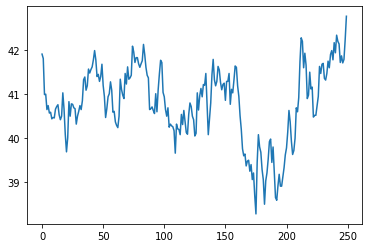

In [65]:
import numpy as np
data = np.loadtxt("prices250.txt")
# prices for a stock 
stock_num = 19 # for stock #11  (0-99)

import matplotlib.pyplot as plt


prices = []
for i in data:
    prices.append(i[stock_num])
plt.plot(prices)
plt.show()

Stock 15 seems like a  relatively non volatile stock

### Thresholding data
Use first 150 days data to come up with a threshold value for long hold

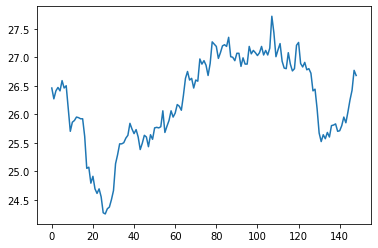

In [66]:
data_100 = []
for i in range(1, 150):
    data_100.append(data[i][15])
plt.plot(data_100)
plt.show()

In [67]:
SEQUENCE_LENGTH = 25
NUM_SEQUENCES = 35

sequences = [] 
for i in range(0, NUM_SEQUENCES):
    temp_seq = []
    for j in range(0, SEQUENCE_LENGTH):
        term = np.random.randint(0, 149)
        temp_seq.append(data_100[term])
    sequences.append(temp_seq)

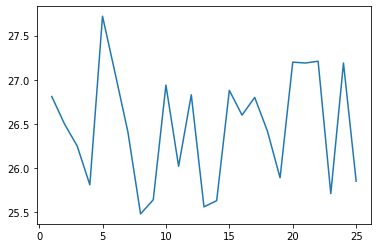

In [68]:
seq_vector = []
for j in range(1, SEQUENCE_LENGTH+1):
    seq_vector.append(j)    
plt.plot(seq_vector, sequences[1])
plt.show()

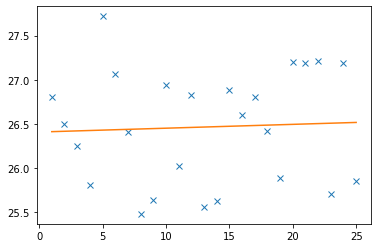

26.84318461538458

In [69]:
# perform linear regression on the above 
# TODO: ALT: use origional x values

from numpy.polynomial.polynomial import polyfit

x = np.array(seq_vector)
y = np.array(sequences[1])
b, m = polyfit(x, y, 1)

plt.plot(x, y, 'x')
plt.plot(x, b + m * x, '-')
plt.show()
pred = 100*(m) + b
pred

In [70]:
real_values = []
for seq in sequences:
    x = np.array(seq_vector)
    y = np.array(seq)
    b, m = polyfit(x, y, 1)
    pred = 100*(m) + b
    real_values.append(pred)

In [71]:
sum = 0
for t in real_values:
    sum += t
threshold = sum/len(real_values)

In [72]:
threshold

26.45991340659338

# Got a threshold 26.4599
Make trades for next 60 days and check p/l

#### Make a prediction loop

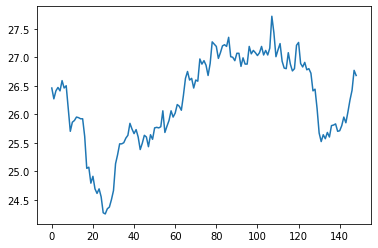

In [73]:
next_60_values = []
for i in range(150, 210):
    next_60_values.append(data[i][15])
plt.plot(data_100)
plt.show()

In [74]:
# Simple implementation of buy-sell order (no short selling)

MAX_MONEY = 10000
position = False
buy_pos = 0
total_traded  = 0
for val in next_60_values:
    if val < threshold:
        if position == False:
            qty = MAX_MONEY % val
            qty = (MAX_MONEY-qty)/val
            money = qty*val
            print(f'BUY {qty}@{val} == {money}')
            buy_pos = qty
            total_traded += money
            position = True
    if val > threshold:
        if position:
            m = buy_pos*val
            print(f'SELL {buy_pos}@{val} == {m}')
            buy_pos = 0
            position = False
            total_traded += m
            

BUY 379.0@26.33 == 9979.07
SELL 379.0@26.71 == 10123.09
BUY 379.0@26.36 == 9990.44
SELL 379.0@26.58 == 10073.82


In [75]:
commission = total_traded * 0.0050
commission

200.8321

## Result
profit = 144.02 + 83.38 - commission = 25.56

# TODO (IMPROVEMENTS)
* Use polynomial for threshold calculation maybe??
* Pretty sure increaseing sequences might not make much difference to threshold as i expect them to converge
* Implement better buying/selling decisions and short selling

## strategies for buy/sell signals
* Evaluate a threshold for buying and selling price based on threshold price for the stock and commission st profit >> com,ission